Notebook 5, Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2021-09-03, A. Mühlemann, University of Bern. 

*This notebook is based on last year's notebook by S. Haug and G. Conti.*

## Project work Module 2

This is my project work for Module 2. Plots, numbers and tables for the poster or presentation are produced with this Notebook.

The data used is the Iris data set. Available here:
https://archive.ics.uci.edu/ml/datasets/iris

**Outline of the data analysis** 3x45 min (depending on your background)

- Introduction (situation and goal)
- Descriptive part
- Data filtering with efficiency from fitted models
- Hypothesis testing
- Conclusions


## 1. Introduction

I am in court as a data science expert. My task is to give advice to the judges. I will have 15 minutes time and plan to bring slides for the presentation. This way court participants can also look at it in the breaks.

**Situation (fictional):**

Some new company v4Setosa recently sequenced the genes of the Iris species Setosa and patented it, apparently in order to preserve this species because it is so beautiful. Due this patent it is not allowed to change the plant.

A big farmer and hater of Iris and with a field where Iris is a disturbing weed, has been using a new product from Sonte Manto for a couple of years. The product is supposed to effectively kill Iris plants.

A big Iris lover collected a sample of Iris plants from the farmer's field and thinks the Iris Setosa setal leaves are bigger than normal. She sent the sample to v4setosa, which in turn came to the conclusion that Setosa must have mutated due to the product from Sonte Manto. 

So w4setosa sued Sonte Manto with the claim that they have changed the plant with their product. Sonte Manto may risk to pay a billion dollars. The court has asked me to give a neutral and scientific advice. 

**Data Analysis**

- Data collection
    - Request a larger Iris sample from a field far away from the farmer -dataset 0. The data is labeled as the local collector had separate greenhouses for each species.
    - Request a Iris sample from the farmer (collected by some neutral person) - dataset 1. The data is a random mix of all species
- Description of the data
    - Calculate means, variances and correlations
    - Test normality
    - Choose good plots
- Find by **regression** a good way to filter out setosa in the farmer sample (increases the the power of the final test)
- Add a **test** to the filtered sample, checking if the farmer setosa leaves differ significantly from the reference sample
- Conclude
- (Additionally **exclude** all mutation hypotheses not compatible with this experiment)






**Definition of significant**

We consider p-values below 0.001 as unlikely enough to reject the fluctuation hypothesis. We will for such values advice the court to consider it as a mutation. (This is a weak point that the laywers of Sonte Manto will of course attack.) 

## 2. Description of the datasets

We artificially create the datasets. Out of the first 30 entries from each Iris species make the reference sets (annotated/labeled). With the rest, 20 rows per species, we create a mixed sample being the farmer sample (not anotated).   

**Import modules we may need**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

**Create the datasets** 

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_org = pd.read_csv(url,names=['slength','swidth','plength','pwidth','species'])
df_ref_set = df_org[df_org['species']=='Iris-setosa'][:30]
df_ref_vir = df_org[df_org['species']=='Iris-virginica'][:30]
df_ref_ver = df_org[df_org['species']=='Iris-versicolor'][:30]
df_farm_1  = df_org[df_org['species']=='Iris-setosa'][30:]
df_farm_2  = df_org[df_org['species']=='Iris-virginica'][30:]
df_farm_3  = df_org[df_org['species']=='Iris-versicolor'][30:]
df_farm    = df_farm_1.append(df_farm_2.append(df_farm_3))


The labels in the farmer dataset are unknown, so we remove them to 'simulate' the real situation.

In [ ]:
df_farm['species']='Unknown'
df_farm.head()

,slength,swidth,plength,pwidth,species
30,4.8,3.1,1.6,0.2,Unknown
31,5.4,3.4,1.5,0.4,Unknown
32,5.2,4.1,1.5,0.1,Unknown
33,5.5,4.2,1.4,0.2,Unknown
34,4.9,3.1,1.5,0.1,Unknown


**Describe setosa**

In [ ]:
df_ref_set.describe()

,slength,swidth,plength,pwidth
count,30.000000,30.000000,30.000000,30.000000
mean,5.026667,3.450000,1.473333,0.246667
std,0.372256,0.350123,0.185571,0.100801
min,4.300000,2.900000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.675000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.500000


**Describe virginica**

In [ ]:
df_ref_vir.describe()

,slength,swidth,plength,pwidth
count,30.000000,30.000000,30.000000,30.000000
mean,6.583333,2.933333,5.603333,2.006667
std,0.688869,0.334595,0.626695,0.255874
min,4.900000,2.200000,4.500000,1.500000
25%,6.225000,2.725000,5.100000,1.800000
50%,6.500000,2.950000,5.600000,2.000000
75%,7.175000,3.150000,5.975000,2.175000
max,7.700000,3.800000,6.900000,2.500000


**Describe versicolor**

In [ ]:
df_ref_ver.describe()

,slength,swidth,plength,pwidth
count,30.000000,30.000000,30.000000,30.000000
mean,6.070000,2.790000,4.333333,1.353333
std,0.545925,0.328371,0.459635,0.211291
min,4.900000,2.000000,3.300000,1.000000
25%,5.700000,2.625000,4.000000,1.300000
50%,6.100000,2.850000,4.500000,1.400000
75%,6.475000,3.000000,4.700000,1.500000
max,7.000000,3.300000,5.000000,1.800000


**Describe the unknown sample**

In [ ]:
df_farm.describe()

,slength,swidth,plength,pwidth
count,60.000000,60.000000,60.000000,60.000000
mean,5.768333,3.048333,3.691667,1.193333
std,0.796495,0.428830,1.729141,0.778932
min,4.400000,2.300000,1.200000,0.100000
25%,5.100000,2.775000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.300000,3.300000,5.100000,1.825000
max,7.900000,4.200000,6.400000,2.500000


The descriptive measures from the possibly mutated sample do not seem to differ a lot from the known species. But since it's a mix it also does not really coincide with a specific species

**Plot the histograms**

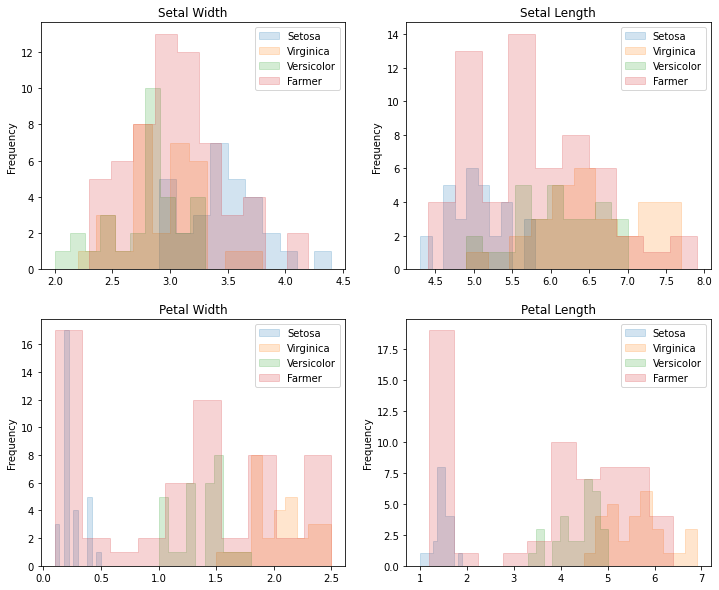

In [ ]:
datasets = [df_ref_set['swidth'],df_ref_vir['swidth'],df_ref_ver['swidth'],df_farm['swidth'] ]
dataset_labels = ['Setosa','Virginica','Versicolor','Farmer'] 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Setal Width')
i=0
for dataset in datasets[0:4]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
plt.legend()
plt.subplot(2,2,2)
plt.title('Setal Length')
datasets2 = [df_ref_set['slength'],df_ref_vir['slength'],df_ref_ver['slength'],df_farm['slength'] ]
i=0
for dataset in datasets2[0:4]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
plt.legend()
#plt.show()
plt.subplot(2,2,3)
plt.title('Petal Width')
datasets3 = [df_ref_set['pwidth'],df_ref_vir['pwidth'],df_ref_ver['pwidth'],df_farm['pwidth'] ]
i=0
for dataset in datasets3[0:4]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
plt.legend()
#plt.show()
plt.subplot(2,2,4)
plt.title('Petal Length')
datasets4 = [df_ref_set['plength'],df_ref_vir['plength'],df_ref_ver['plength'],df_farm['plength'] ]
i=0
for dataset in datasets4[0:4]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
plt.legend()
plt.show()

While the 3 known species seem the differ a bit from each other concerning the four characteristics, the sample from the farmers field seem to not strongly differ from any of known species however one can clearly see that it might be a mix of all species.

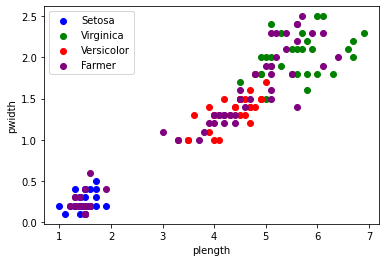

In [ ]:
plt.subplot(1,1,1)
plt.scatter(df_ref_set['plength'],df_ref_set['pwidth'],c='b',label='Setosa')
plt.scatter(df_ref_vir['plength'],df_ref_vir['pwidth'],c='g',label='Virginica')
plt.scatter(df_ref_ver['plength'],df_ref_ver['pwidth'],c='r',label='Versicolor')
plt.scatter(df_farm['plength'],df_farm['pwidth'],c='purple',label='Farmer')
plt.xlabel('plength')
plt.ylabel('pwidth')
plt.legend()
plt.show()

Take a look at the sepal version of the plot, too.

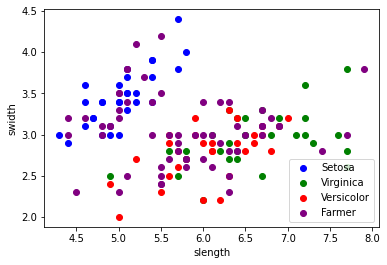

In [ ]:
plt.subplot(1,1,1)
plt.scatter(df_ref_set['slength'],df_ref_set['swidth'],c='b',label='Setosa')
plt.scatter(df_ref_vir['slength'],df_ref_vir['swidth'],c='g',label='Virginica')
plt.scatter(df_ref_ver['slength'],df_ref_ver['swidth'],c='r',label='Versicolor')
plt.scatter(df_farm['slength'],df_farm['swidth'],c='purple',label='Farmer')
plt.xlabel('slength')
plt.ylabel('swidth')
plt.legend()
plt.show()

Also here the characteristics of the sample from the farm does not seem to fall out of the range of the reference samples


## 3. Test the hypothesis

**Check normality**

First we consider *swidth*

In [ ]:
print('p-values from the normality tests on the setal width (D Agostino-Pearson):')
datasets        = [df_ref_set['swidth'],df_ref_vir['swidth'],df_ref_ver['swidth'],df_farm['swidth'] ]
dataset_labels = ['Setosa','Virginica','Versicolor','Farmer'] 
i = 0
for dataset in datasets:
  k2, p = stats.normaltest(dataset) # D Agostino-Pearson
  print('%10s %1.2f ' % (dataset_labels[i],p))
  i+=1

p-values from the normality tests on the setal width (D Agostino-Pearson):
    Setosa 0.30 
 Virginica 0.34 
Versicolor 0.23 
    Farmer 0.30 


*slength*

In [ ]:
print('p-values from the normality tests on the setal width (D Agostino-Pearson):')
datasets        = [df_ref_set['slength'],df_ref_vir['slength'],df_ref_ver['slength'],df_farm['slength'] ]
dataset_labels = ['Setosa','Virginica','Versicolor','Farmer'] 
i = 0
for dataset in datasets:
  k2, p = stats.normaltest(dataset) # D Agostino-Pearson
  print('%10s %1.2f ' % (dataset_labels[i],p))
  i+=1

p-values from the normality tests on the setal width (D Agostino-Pearson):
    Setosa 0.85 
 Virginica 0.93 
Versicolor 0.69 
    Farmer 0.26 


*plength*

In [ ]:
print('p-values from the normality tests on the setal width (D Agostino-Pearson):')
datasets        = [df_ref_set['plength'],df_ref_vir['plength'],df_ref_ver['plength'],df_farm['plength'] ]
dataset_labels = ['Setosa','Virginica','Versicolor','Farmer'] 
i = 0
for dataset in datasets:
  k2, p = stats.normaltest(dataset) # D Agostino-Pearson
  print('%10s %1.2f ' % (dataset_labels[i],p))
  i+=1

p-values from the normality tests on the setal width (D Agostino-Pearson):
    Setosa 0.31 
 Virginica 0.52 
Versicolor 0.25 
    Farmer 0.00 


*pwidth*

In [ ]:
print('p-values from the normality tests on the setal width (D Agostino-Pearson):')
datasets        = [df_ref_set['pwidth'],df_ref_vir['pwidth'],df_ref_ver['pwidth'],df_farm['pwidth'] ]
dataset_labels = ['Setosa','Virginica','Versicolor','Farmer'] 
i = 0
for dataset in datasets:
  k2, p = stats.normaltest(dataset) # D Agostino-Pearson
  print('%10s %1.2f ' % (dataset_labels[i],p))
  i+=1

p-values from the normality tests on the setal width (D Agostino-Pearson):
    Setosa 0.13 
 Virginica 0.74 
Versicolor 0.79 
    Farmer 0.00 


The normality test looks fine for *slength* and *swidth*, however for *plength* and *pwidth* the normality assumption for the farmers sample is violated.
So techinally we could use test's suited for normalitly when considering *slength* and *swidth*. However, when trying to submit a paper it's often tedious to argue why some tests are parametric and some are not. Thus, we just use nonparametric tests here. Moreover, the Q-Q-Plots do also not look ideal.


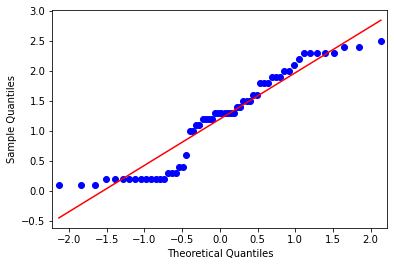

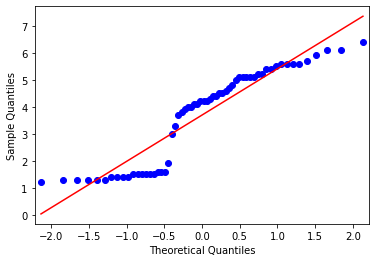

In [ ]:
import statsmodels.api as sm
fig=sm.qqplot(df_farm['pwidth'], line='s' )
sm.qqplot(df_farm['plength'], line='s')
plt.show()

Yesterday's slides suggest that we could perfom a Kruskal-Wallis test to test the hypothesis that the four groups don't differ. We have to do this for each characteristic separately. I'll illustrate the proccedure with *plength*

In [ ]:
stats.kruskal(df_ref_set['plength'],df_ref_vir['plength'], df_ref_ver['plength'], df_farm['plength'])

KruskalResult(statistic=77.44303560081005, pvalue=1.0849078880123864e-16)

Unfortunately, the p-value is very small so that we reject the null hypothesis that the four groups do not differ. But we need to be careful. The reason for the p-value to be significant could be due to the fact that, for example, setosa differs from virginica. So let us perform paired test between setosa and the farmers sample to be sure. For us it makes sense to use two-sided Mann Whitney U tests.

In [ ]:
stats.mannwhitneyu(df_ref_set['plength'],df_farm['plength'], alternative='two-sided')

MannwhitneyuResult(statistic=341.0, pvalue=1.6006260309353628e-06)

The p-value is very small. Does this mean that there did indeed a mutation take place?

Let's quickly think about whether this is actually a fair comparison. We said in the beginning that the farmers data is a random mix of all species. So actually the significant p-values could be due to us comparing some setosa samples to virginca samples because the farmer had chosen many virginica samples by chance. So let us make our comparison more fair. To this end we try to make a very simple filter to get the setosa samples from the farmers sample.

# 4. Filter the farmer data

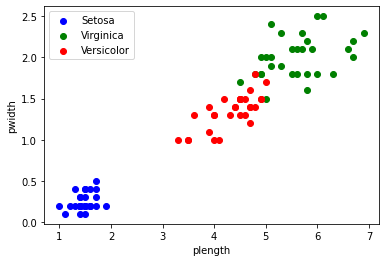

In [ ]:
plt.subplot(1,1,1)
plt.scatter(df_ref_set['plength'],df_ref_set['pwidth'],c='b',label='Setosa')
plt.scatter(df_ref_vir['plength'],df_ref_vir['pwidth'],c='g',label='Virginica')
plt.scatter(df_ref_ver['plength'],df_ref_ver['pwidth'],c='r',label='Versicolor')
plt.xlabel('plength')
plt.ylabel('pwidth')
plt.legend()
plt.show()

A discrimination should work very well. However, we don't see the full distribution and this is just by eye. I will take a look at the sepal version of the plot, too.

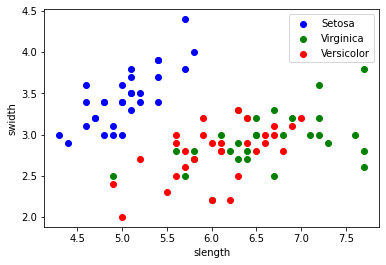

In [ ]:
plt.subplot(1,1,1)
plt.scatter(df_ref_set['slength'],df_ref_set['swidth'],c='b',label='Setosa')
plt.scatter(df_ref_vir['slength'],df_ref_vir['swidth'],c='g',label='Virginica')
plt.scatter(df_ref_ver['slength'],df_ref_ver['swidth'],c='r',label='Versicolor')
plt.xlabel('slength')
plt.ylabel('swidth')
plt.legend()
plt.show()

Also here a good separation seems easy by using a line. Fitting a line which best separates between two samples belongs to Module 3. Here we will choose by eye two cuts in the petal plane and estimate the efficiency of the filter by using generated values from fitted models.

### Filtering out Setosa from the farmer sample

Let us fit normal distributions to the reference samples. Then generate 100 000 rows with these distributions, plot the scatter plots with this simulated data, define the fitering cuts and calculate the efficiency of our filter.

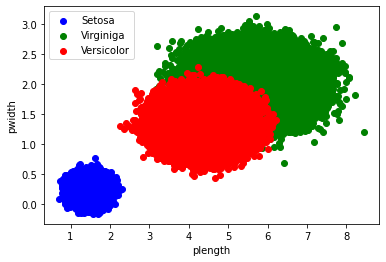

In [ ]:
import scipy
mean, sd = scipy.stats.norm.fit(df_ref_set['plength'])
df_gen_pl_set = scipy.stats.norm.rvs(mean,sd,100000)
mean, sd = scipy.stats.norm.fit(df_ref_set['pwidth'])
df_gen_pw_set = scipy.stats.norm.rvs(mean,sd,100000)

mean, sd = scipy.stats.norm.fit(df_ref_vir['plength'])
df_gen_pl_vir = scipy.stats.norm.rvs(mean,sd,100000)
mean, sd = scipy.stats.norm.fit(df_ref_vir['pwidth'])
df_gen_pw_vir = scipy.stats.norm.rvs(mean,sd,100000)

mean, sd = scipy.stats.norm.fit(df_ref_ver['plength'])
df_gen_pl_ver = scipy.stats.norm.rvs(mean,sd,100000)
mean, sd = scipy.stats.norm.fit(df_ref_ver['pwidth'])
df_gen_pw_ver = scipy.stats.norm.rvs(mean,sd,100000)

plt.subplot(1,1,1)
plt.scatter(df_gen_pl_set,df_gen_pw_set,c='b',label='Setosa')
plt.scatter(df_gen_pl_vir,df_gen_pw_vir,c='g',label='Virginiga')
plt.scatter(df_gen_pl_ver,df_gen_pw_ver,c='r',label='Versicolor')
plt.xlabel('plength')
plt.ylabel('pwidth')
plt.legend()
plt.show()

**Filter choice:** plength<2.5 and pwidth<1.0
    
**Filter efficiency:** 
- Setosa 1.0 (100%)
- Virginica 0.0
- Versicolor 0.0 

### Filter the farmer data

In [ ]:
df_farm = df_farm.sort_values('slength')
df_farm_set = df_farm[df_farm['plength'] < 2.5]
df_farm_rest=df_farm[df_farm['plength'] >= 2.5]
df_farm_set

,slength,swidth,plength,pwidth,species
42,4.4,3.2,1.3,0.2,Unknown
38,4.4,3.0,1.3,0.2,Unknown
41,4.5,2.3,1.3,0.3,Unknown
47,4.6,3.2,1.4,0.2,Unknown
30,4.8,3.1,1.6,0.2,Unknown
45,4.8,3.0,1.4,0.3,Unknown
37,4.9,3.1,1.5,0.1,Unknown
34,4.9,3.1,1.5,0.1,Unknown
49,5.0,3.3,1.4,0.2,Unknown
40,5.0,3.5,1.3,0.3,Unknown


# 5. Back to tesing

Rerun the tests for the filtered data


In [ ]:
stats.mannwhitneyu(df_ref_set['plength'],df_farm_set['plength'], alternative='two-sided')

MannwhitneyuResult(statistic=341.0, pvalue=0.41266453964477956)

Now the p-value is not so small anymore. How about the other characteristics?

In [ ]:
stats.mannwhitneyu(df_ref_set['pwidth'],df_farm_set['pwidth'], alternative='two-sided')

MannwhitneyuResult(statistic=320.0, pvalue=0.6693088928359507)

In [ ]:
stats.mannwhitneyu(df_ref_set['slength'],df_farm_set['slength'], alternative='two-sided')

MannwhitneyuResult(statistic=317.0, pvalue=0.7424278372172379)

In [ ]:
stats.mannwhitneyu(df_ref_set['swidth'],df_farm_set['swidth'], alternative='two-sided')

MannwhitneyuResult(statistic=329.0, pvalue=0.5701971439927103)

Hence, we have no grounds to assume that setosa has mutated on the farmers field.

## Conclusion

Our data analysis cannot confirm the claim of v4setosa. There is absolutely no evidence for the claim in our independent study. We advice the court to judge for not guilty. 

(And we sent a very large bill which the looser v4setosa had to pay. v4setosa went bankrott and we cannot sleep anymore...)

(of course there is grounds to be critical with our analysis. By filtering what we believed to be setosa samples from the farmers sample we might have removed the strongly mutated ones with our filter. Unfortunately, with what was presented to us, we either had the chance to filter and end up with the results in section 5, or not filter and end up with the results in section 3. Both are not ideal. Maybe some labels would be helpful.

## Remarks regarding the poster session

I used four hours for this small analysis. To work it out, doing more tests, think through, study here and there, make nice tables and plots, create the poster, I would probably need another 10 hours. 

Considering that you may need longer due to less experience, this is what is expected from you for the poster session (about 30h work).